#**ML ASSIGNMENT 5**
###**NAME: ARPIT MISHRA**
###**Roll Number: 2018IMT-020**
###**Course: Machine Learning Lab**
###**Course Code: ITIT - 4107**
###**Deadline : 18 October 2021**

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import pyplot as bar
from scipy.stats import multivariate_normal as mvn

In [10]:
data = pd.read_csv('iris.data', header=None).values
np.random.shuffle(data)
X = data[:, :4]
Y = data[:, 4:]
feature=['SepalLength','SepalWidth','PetalLength','PetalWidth']
classes=['Iris-setosa','Iris-versicolor','Iris-virginica']

In [11]:
for i,num in enumerate(Y):
        if Y[i]=='Iris-setosa':
            Y[i]=0
        if Y[i]=='Iris-versicolor':
            Y[i]=1
        if Y[i]=='Iris-virginica':
            Y[i]=2

Y=Y.flatten()
Ntrain = int(0.6*len(Y))
Xtrain, Ytrain = X[:int(Ntrain)], Y[:int(Ntrain)]
Xtest, Ytest = X[int(Ntrain):], Y[int(Ntrain):]

In [12]:
class NaiveBayes(object):
    def fit(self, X, Y, smoothing=10e-4):
        self.gaussians = dict()
        self.priors = dict()
        labels = set(Y)
        for c in labels:
            current_x = X[Y == c]

            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'var': current_x.var(axis=0) + smoothing,
            }
            self.priors[c] = float(len(Y[Y == c])) / len(Y)

    def predict(self, X):
        N, D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N, K))
        for c, g in self.gaussians.items():
            mean, var = g['mean'], g['var']
            P[:, c] = mvn.logpdf(X, mean=mean, cov=var,allow_singular=True) + np.log(self.priors[c])

        return np.argmax(P, axis=1)

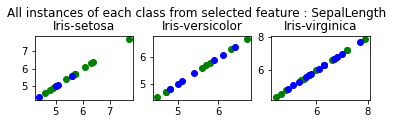

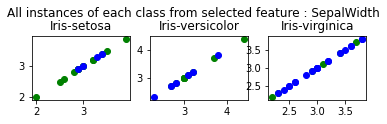

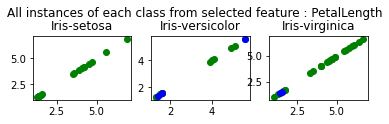

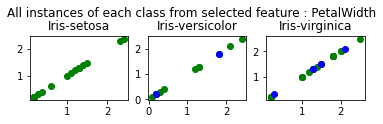

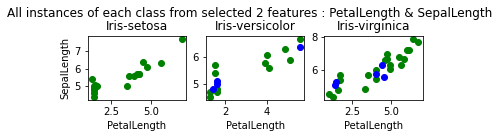

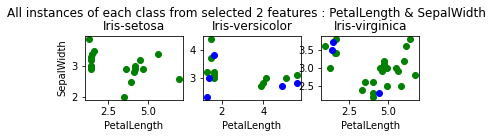

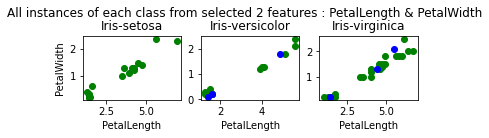

In [13]:
model = NaiveBayes()
model.fit(Xtrain, Ytrain)
FIN = model.predict(Xtest)

visit=[0,0,0,0]
Xfeat=np.zeros((X.shape[0],1))
totalaccuracy,maxaccuracy,ind=0,0,0
used,accuracy,ystr=[],[],[]

for i in range(0,4):
    ti=i
    for j in range(0,4):
        if visit[j]==1:
            continue

        model = NaiveBayes()
        Xfeat=np.append(Xfeat,np.reshape(X[:,j],(len(X[:,0]),1)),axis=1)
        model.fit(Xfeat[:Ntrain,1:], Ytrain)

        P = model.predict(Xfeat[Ntrain:,1:])
        tac=np.mean(P==Ytest)
        accuracy.append(tac)

        if(i==0):
            C0,C0i,C1,C1i,C2,C2i,=[],[],[],[],[],[]

            for l,num in enumerate(Ytest):
                if num==P[l]:
                    if num==0:C0.append(Xfeat[l,1])
                    elif num==1:C1.append(Xfeat[l, 1])
                    elif num==2:C2.append(Xfeat[l,1])
                else:
                    if num==0:C0i.append(Xfeat[l,1])
                    elif num==1:C1i.append(Xfeat[l, 1])
                    elif num==2:C2i.append(Xfeat[l,1])

            plt.suptitle('All instances of each class from selected feature : ' + feature[j])
            plt.subplot(3,3,1)
            plt.title(str(classes[0]))
            plt.scatter(C0,C0,color='green')
            plt.scatter(C0i, C0i,color='blue')
            plt.subplot(3, 3, 2)
            plt.title(str(classes[1]))
            plt.scatter(C1,C1,color='green')
            plt.scatter(C1i, C1i,color='blue')
            plt.subplot(3, 3, 3)
            plt.title(str(classes[2]))
            plt.scatter(C2,C2,color='green')
            plt.scatter(C2i, C2i,color='blue')
            plt.show()

        elif (i == 1):
            C0x,C0y, C0xi,C0yi, C1x,C1y, C1xi,C1yi,C2x,C2y, C2xi,C2yi=[],[],[],[],[],[],[],[],[],[],[],[]

            for l, num in enumerate(Ytest):
                if num == P[l]:
                    if num == 0:
                        C0x.append(Xfeat[l, 1])
                        C0y.append(Xfeat[l, 2])
                    elif num == 1:
                        C1x.append(Xfeat[l, 1])
                        C1y.append(Xfeat[l, 2])
                    elif num == 2:
                        C2x.append(Xfeat[l, 1])
                        C2y.append(Xfeat[l, 2])
                else:
                    if num == 0:
                        C0xi.append(Xfeat[l, 1])
                        C0yi.append(Xfeat[l, 2])
                    elif num == 1:
                        C1xi.append(Xfeat[l, 1])
                        C1yi.append(Xfeat[l, 2])
                    elif num == 2:
                        C2xi.append(Xfeat[l, 1])
                        C2yi.append(Xfeat[l, 2])

            plt.suptitle('All instances of each class from selected 2 features : ' + feature[used[0]] + " & " + feature[j])
            plt.subplot(3, 3, 1)
            plt.title(classes[0])
            plt.xlabel(str(feature[used[0]]))
            plt.ylabel(str(feature[j]))
            plt.scatter(C0x, C0y, color='green')
            plt.scatter(C0xi, C0yi, color='blue')
            plt.subplot(3, 3, 2)
            plt.title(classes[1])
            plt.xlabel(str(feature[used[0]]))
            plt.scatter(C1x, C1y, color='green')
            plt.scatter(C1xi, C1yi, color='blue')
            plt.subplot(3, 3, 3)
            plt.title(classes[2])
            plt.xlabel(str(feature[used[0]]))
            plt.scatter(C2x, C2y, color='green')
            plt.scatter(C2xi, C2yi, color='blue')
            plt.show()

        if ti==0:ystr.append(str(feature[j]))
        elif ti==1:ystr.append(str(feature[used[0]])+','+str(feature[j]))
        elif ti==2:ystr.append(str(feature[used[0]])+','+str(feature[used[1]])+','+str(feature[j]))
        elif ti==3:ystr.append(str(feature[used[0]]) + ',' + str(feature[used[1]]) + ',' + str(feature[used[2]]) + ','+ str(feature[j]))

        if(tac>maxaccuracy):
            maxaccuracy=tac
            ind=j

        Xfeat=np.delete(Xfeat, -1, axis=1)

    used.append(ind)
    Xfeat=np.append(Xfeat,np.reshape(X[:,ind],(len(X[:,0]),1)),axis=1)
    visit[ind]=1
    maxaccuracy=0

### Plotting Accuracy of each subset of features

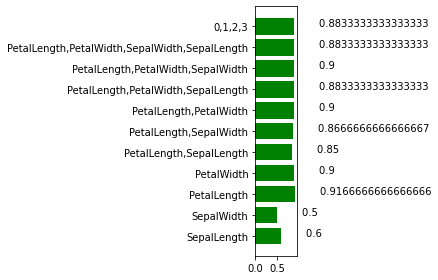

In [14]:
accuracy.append(np.mean(FIN==Ytest))
ystr.append('0,1,2,3')
y_pos = np.arange(len(ystr))
bar.barh(y_pos,accuracy,color='green',linewidth=2)
bar.yticks(y_pos, ystr)
for index, value in enumerate(accuracy):
    bar.text(value, index, "        " + str(value))
bar.tight_layout()
bar.show()